# Real numbers walk

In this notebook I present my pyhton implementation of a way to visualize real numbers. The inspiration came from [this post](https://www.visualcinnamon.com/2015/01/exploring-art-hidden-in-pi.html) from Visual Cinamon where they made quite insteresting plots with R about the number π.

For a more mathematical reading you should see [this article](https://www.carma.newcastle.edu.au/jon/numtools.pdf) from Artacho et. al. (2012).


The main idea is to generate a 2D path plot based on the decimals of a real number. In this notebook I'll work only with some famous irrational numbers.

---
#### Created by
**Rennan Danilo Seimetz Chagas** <br>
Industrial Engineer & Optimization <br>
email: chagasrennan@gmail.com 

## Import packages

We will need some python packages to work with the numbers and plot the paths

In [5]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Transforming numbers into directions

Lets assume that our path allways starts at (0,0) and it follows the direction corresponding to the next digit. For that, we need to build a compass rose with the 10 base numbers (from 0 to 9). Each number designates a direction on this rose.

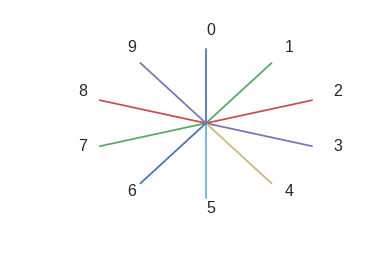

In [45]:
for i in range(10):
    x = [0,np.sin((pi*2)*(i/10))]
    y = [0,np.cos((pi*2)*(i/10))]
    plt.plot(x,y)
    plt.axis([-1.5, 1.5, -1.5, 1.5])
    plt.axis('off')
    plt.annotate(str(i), xy=(1.2*np.sin((pi*2)*(i/10)),1.2*np.cos((pi*2)*(i/10))), fontsize=16)

## Number π example

Lets start to play with this direction using a small number (10) of π decimals

π = 3.1415926535

In [16]:
mypi = '3.1415926535'

mypi.split('.').pop(1) # get only decimals

'1415926535'

In [20]:
number = mypi.split('.').pop(1) # get only decimals

# Path starts at (0,0)
# lx is a list of x axis points
# ly is a list of y axis points
lx, ly = [0],[0]

# Add new points to path
for i in number:
    lx.append(lx[-1] + np.sin((pi*2)*(int(i)/10)))
    ly.append(ly[-1] + np.cos((pi*2)*(int(i)/10)))

# print pair of points
for x,y in zip(lx,ly):
    print('(',x,',',y, ')')

( 0 , 0 )
( 0.587785252292 , 0.809016994375 )
( 1.17557050458 , 1.11022302463e-16 )
( 1.76335575688 , 0.809016994375 )
( 1.76335575688 , -0.190983005625 )
( 1.17557050458 , 0.61803398875 )
( 2.12662702088 , 0.927050983125 )
( 1.53884176859 , 0.11803398875 )
( 1.53884176859 , -0.88196601125 )
( 2.48989828488 , -1.19098300563 )
( 2.48989828488 , -2.19098300563 )


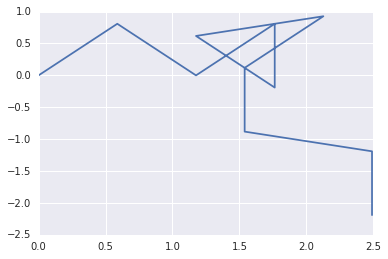

In [21]:
# plot path
plt.plot(lx,ly)

### Now, I'll try the same plot as above, but with 100 decimals of π and some colors

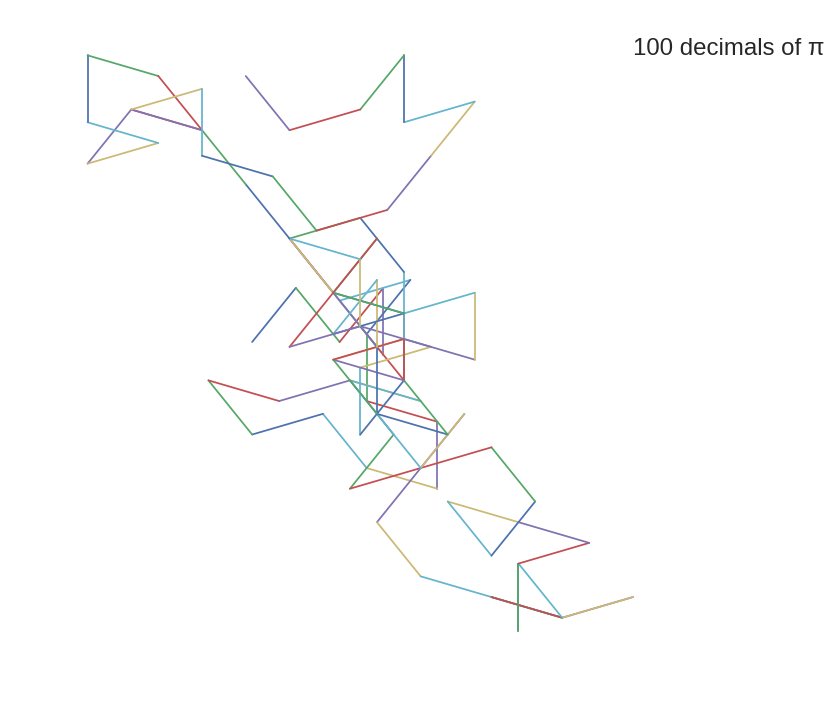

In [52]:
# 100 decimals
mypi = '3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679'

number = mypi.split('.').pop(1) # get only decimals

# Path starts at (0,0)
# lx is a list of x axis points
# ly is a list of y axis points
lx, ly = [0],[0]

# Add new points to path
for i in number:
    lx.append(lx[-1] + np.sin((pi*2)*(int(i)/10)))
    ly.append(ly[-1] + np.cos((pi*2)*(int(i)/10)))
    
plt.figure(figsize=(12,12),dpi=300) # bigger plot with high dpi
plt.axis('off') # remove chart axis

# repeat the plot to get some colors
for i in range(1,len(lx)):
    plt.plot([lx[i-1],lx[i]],[ly[i-1],ly[i]])
    
plt.annotate('100 decimals of π', xy=(max(lx),max(ly)), fontsize=24)

### Now that we have a basic method, I'll create a function to plot a beautifull representation of a walk provided for any real number. 


```python
def pathplot(number, name)
```
    get the number and the name (optional) and returns a jet colormap path with dark background


In [87]:
def pathplot(number, name=None):
    from cycler import cycler
    
    number = number.split('.').pop(1) # get only decimals
    
    # Path starts at (0,0)
    lx, ly = [0],[0]
    
    # Add new points to path
    for i in number:
        lx.append(lx[-1] + np.sin((pi*2)*(int(i)/10)))
        ly.append(ly[-1] + np.cos((pi*2)*(int(i)/10)))

    plt.figure(figsize=(12,12),dpi=300, facecolor='k')
    plt.axis('off')

    # Set color map for plot
    colormap = plt.cm.jet
    plt.gca().set_prop_cycle(cycler('color',[colormap(i) for i in np.linspace(0, 0.9, len(lx))]))

    # Plot segments
    for i in range(1,len(lx)):
        plt.plot([lx[i-1],lx[i]],[ly[i-1],ly[i]])
    
    # add number name to title if given
    title = str(len(number)) +' decimals'
    if name != None: 
        title = title + ' of '+ str(name)
    
    hfont = {'family': 'serif'}
    plt.annotate(title, xy=(max(lx),max(ly)), fontsize=24, color='white', **hfont)

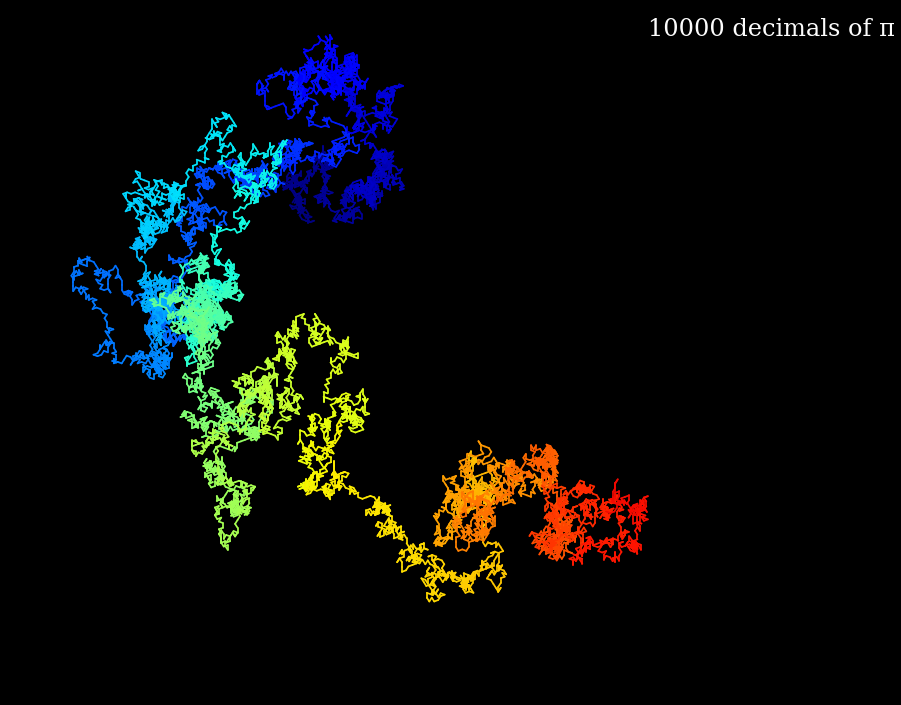

In [88]:
# Number pi
# 100 decimals
short_pi = '3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679'
# 1,000 decimals
medium_pi = '3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679821480865132823066470938446095505822317253594081284811174502841027019385211055596446229489549303819644288109756659334461284756482337867831652712019091456485669234603486104543266482133936072602491412737245870066063155881748815209209628292540917153643678925903600113305305488204665213841469519415116094330572703657595919530921861173819326117931051185480744623799627495673518857527248912279381830119491298336733624406566430860213949463952247371907021798609437027705392171762931767523846748184676694051320005681271452635608277857713427577896091736371787214684409012249534301465495853710507922796892589235420199561121290219608640344181598136297747713099605187072113499999983729780499510597317328160963185950244594553469083026425223082533446850352619311881710100031378387528865875332083814206171776691473035982534904287554687311595628638823537875937519577818577805321712268066130019278766111959092164201989'
# 10,000 decimals
large_pi = "3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679821480865132823066470938446095505822317253594081284811174502841027019385211055596446229489549303819644288109756659334461284756482337867831652712019091456485669234603486104543266482133936072602491412737245870066063155881748815209209628292540917153643678925903600113305305488204665213841469519415116094330572703657595919530921861173819326117931051185480744623799627495673518857527248912279381830119491298336733624406566430860213949463952247371907021798609437027705392171762931767523846748184676694051320005681271452635608277857713427577896091736371787214684409012249534301465495853710507922796892589235420199561121290219608640344181598136297747713099605187072113499999983729780499510597317328160963185950244594553469083026425223082533446850352619311881710100031378387528865875332083814206171776691473035982534904287554687311595628638823537875937519577818577805321712268066130019278766111959092164201989380952572010654858632788659361533818279682303019520353018529689957736225994138912497217752834791315155748572424541506959508295331168617278558890750983817546374649393192550604009277016711390098488240128583616035637076601047101819429555961989467678374494482553797747268471040475346462080466842590694912933136770289891521047521620569660240580381501935112533824300355876402474964732639141992726042699227967823547816360093417216412199245863150302861829745557067498385054945885869269956909272107975093029553211653449872027559602364806654991198818347977535663698074265425278625518184175746728909777727938000816470600161452491921732172147723501414419735685481613611573525521334757418494684385233239073941433345477624168625189835694855620992192221842725502542568876717904946016534668049886272327917860857843838279679766814541009538837863609506800642251252051173929848960841284886269456042419652850222106611863067442786220391949450471237137869609563643719172874677646575739624138908658326459958133904780275900994657640789512694683983525957098258226205224894077267194782684826014769909026401363944374553050682034962524517493996514314298091906592509372216964615157098583874105978859597729754989301617539284681382686838689427741559918559252459539594310499725246808459872736446958486538367362226260991246080512438843904512441365497627807977156914359977001296160894416948685558484063534220722258284886481584560285060168427394522674676788952521385225499546667278239864565961163548862305774564980355936345681743241125150760694794510965960940252288797108931456691368672287489405601015033086179286809208747609178249385890097149096759852613655497818931297848216829989487226588048575640142704775551323796414515237462343645428584447952658678210511413547357395231134271661021359695362314429524849371871101457654035902799344037420073105785390621983874478084784896833214457138687519435064302184531910484810053706146806749192781911979399520614196634287544406437451237181921799983910159195618146751426912397489409071864942319615679452080951465502252316038819301420937621378559566389377870830390697920773467221825625996615014215030680384477345492026054146659252014974428507325186660021324340881907104863317346496514539057962685610055081066587969981635747363840525714591028970641401109712062804390397595156771577004203378699360072305587631763594218731251471205329281918261861258673215791984148488291644706095752706957220917567116722910981690915280173506712748583222871835209353965725121083579151369882091444210067510334671103141267111369908658516398315019701651511685171437657618351556508849099898599823873455283316355076479185358932261854896321329330898570642046752590709154814165498594616371802709819943099244889575712828905923233260972997120844335732654893823911932597463667305836041428138830320382490375898524374417029132765618093773444030707469211201913020330380197621101100449293215160842444859637669838952286847831235526582131449576857262433441893039686426243410773226978028073189154411010446823252716201052652272111660396665573092547110557853763466820653109896526918620564769312570586356620185581007293606598764861179104533488503461136576867532494416680396265797877185560845529654126654085306143444318586769751456614068007002378776591344017127494704205622305389945613140711270004078547332699390814546646458807972708266830634328587856983052358089330657574067954571637752542021149557615814002501262285941302164715509792592309907965473761255176567513575178296664547791745011299614890304639947132962107340437518957359614589019389713111790429782856475032031986915140287080859904801094121472213179476477726224142548545403321571853061422881375850430633217518297986622371721591607716692547487389866549494501146540628433663937900397692656721463853067360965712091807638327166416274888800786925602902284721040317211860820419000422966171196377921337575114959501566049631862947265473642523081770367515906735023507283540567040386743513622224771589150495309844489333096340878076932599397805419341447377441842631298608099888687413260472156951623965864573021631598193195167353812974167729478672422924654366800980676928238280689964004824354037014163149658979409243237896907069779422362508221688957383798623001593776471651228935786015881617557829735233446042815126272037343146531977774160319906655418763979293344195215413418994854447345673831624993419131814809277771038638773431772075456545322077709212019051660962804909263601975988281613323166636528619326686336062735676303544776280350450777235547105859548702790814356240145171806246436267945612753181340783303362542327839449753824372058353114771199260638133467768796959703098339130771098704085913374641442822772634659470474587847787201927715280731767907707157213444730605700733492436931138350493163128404251219256517980694113528013147013047816437885185290928545201165839341965621349143415956258658655705526904965209858033850722426482939728584783163057777560688876446248246857926039535277348030480290058760758251047470916439613626760449256274204208320856611906254543372131535958450687724602901618766795240616342522577195429162991930645537799140373404328752628889639958794757291746426357455254079091451357111369410911939325191076020825202618798531887705842972591677813149699009019211697173727847684726860849003377024242916513005005168323364350389517029893922334517220138128069650117844087451960121228599371623130171144484640903890644954440061986907548516026327505298349187407866808818338510228334508504860825039302133219715518430635455007668282949304137765527939751754613953984683393638304746119966538581538420568533862186725233402830871123282789212507712629463229563989898935821167456270102183564622013496715188190973038119800497340723961036854066431939509790190699639552453005450580685501956730229219139339185680344903982059551002263535361920419947455385938102343955449597783779023742161727111723643435439478221818528624085140066604433258885698670543154706965747458550332323342107301545940516553790686627333799585115625784322988273723198987571415957811196358330059408730681216028764962867446047746491599505497374256269010490377819868359381465741268049256487985561453723478673303904688383436346553794986419270563872931748723320837601123029911367938627089438799362016295154133714248928307220126901475466847653576164773794675200490757155527819653621323926406160136358155907422020203187277605277219005561484255518792530343513984425322341576233610642506390497500865627109535919465897514131034822769306247435363256916078154781811528436679570611086153315044521274739245449454236828860613408414863776700961207151249140430272538607648236341433462351897576645216413767969031495019108575984423919862916421939949072362346468441173940326591840443780513338945257423995082965912285085558215725031071257012668302402929525220118726767562204154205161841634847565169998116141010029960783869092916030288400269104140792886215078424516709087000699282120660418371806535567252532567532861291042487761825829765157959847035622262934860034158722980534989650226291748788202734209222245339856264766914905562842503912757710284027998066365825488926488025456610172967026640765590429099456815065265305371829412703369313785178609040708667114965583434347693385781711386455873678123014587687126603489139095620099393610310291616152881384379099042317473363948045759314931405297634757481193567091101377517210080315590248530906692037671922033229094334676851422144773793937517034436619910403375111735471918550464490263655128162288244625759163330391072253837421821408835086573917715096828874782656995995744906617583441375223970968340800535598491754173818839994469748676265516582765848358845314277568790029095170283529716344562129640435231176006651012412006597558512761785838292041974844236080071930457618932349229279650198751872127267507981255470958904556357921221033346697499235630254947802490114195212382815309114079073860251522742995818072471625916685451333123948049470791191532673430282441860414263639548000448002670496248201792896476697583183271314251702969234889627668440323260927524960357996469256504936818360900323809293459588970695365349406034021665443755890045632882250545255640564482465151875471196218443965825337543885690941130315095261793780029741207665147939425902989695946995565761218656196733786236256125216320862869222103274889218654364802296780705765615144632046927906821207388377814233562823608963208068222468012248261177185896381409183903673672220888321513755600372798394004152970028783076670944474560134556417254370906979396122571429894671543578468788614445812314593571984922528471605049221242470141214780573455105008019086996033027634787081081754501193071412233908663938339529425786905076431006383519834389341596131854347546495569781038293097164651438407007073604112373599843452251610507027056235266012764848308407611830130527932054274628654036036745328651057065874882256981579367897669742205750596834408697350201410206723585020072452256326513410559240190274216248439140359989535394590944070469120914093870012645600162374288021092764579310657922955249887275846101264836999892256959688159205600101655256375678"

pathplot(large_pi, 'π')

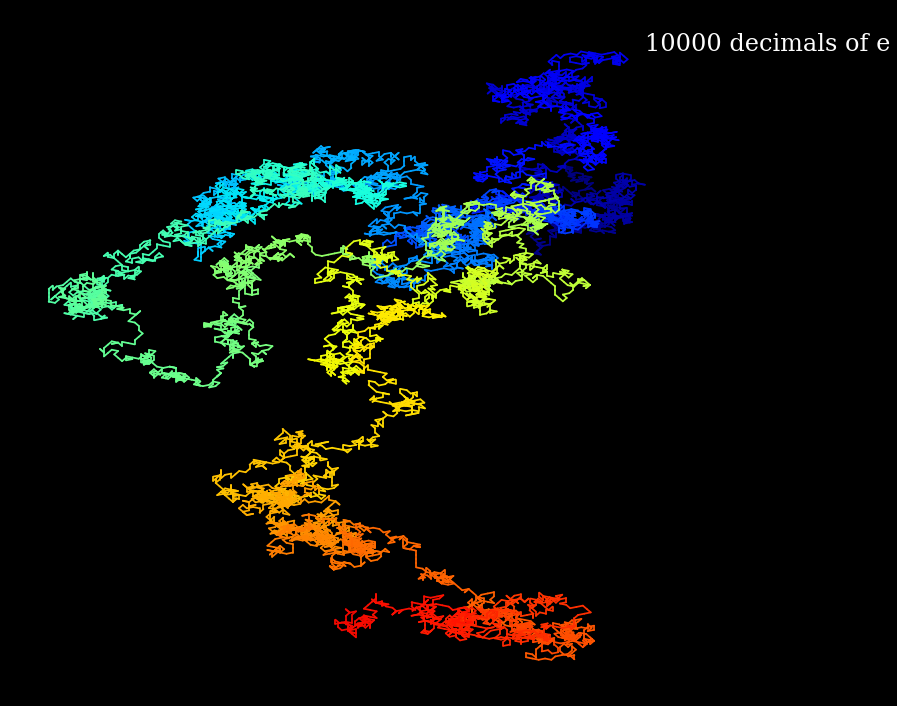

In [90]:
# Number e
# 10,000 decimals
large_e = '2.7182818284590452353602874713526624977572470936999595749669676277240766303535475945713821785251664274274663919320030599218174135966290435729003342952605956307381323286279434907632338298807531952510190115738341879307021540891499348841675092447614606680822648001684774118537423454424371075390777449920695517027618386062613313845830007520449338265602976067371132007093287091274437470472306969772093101416928368190255151086574637721112523897844250569536967707854499699679468644549059879316368892300987931277361782154249992295763514822082698951936680331825288693984964651058209392398294887933203625094431173012381970684161403970198376793206832823764648042953118023287825098194558153017567173613320698112509961818815930416903515988885193458072738667385894228792284998920868058257492796104841984443634632449684875602336248270419786232090021609902353043699418491463140934317381436405462531520961836908887070167683964243781405927145635490613031072085103837505101157477041718986106873969655212671546889570350354021234078498193343210681701210056278802351930332247450158539047304199577770935036604169973297250886876966403555707162268447162560798826517871341951246652010305921236677194325278675398558944896970964097545918569563802363701621120477427228364896134225164450781824423529486363721417402388934412479635743702637552944483379980161254922785092577825620926226483262779333865664816277251640191059004916449982893150566047258027786318641551956532442586982946959308019152987211725563475463964479101459040905862984967912874068705048958586717479854667757573205681288459205413340539220001137863009455606881667400169842055804033637953764520304024322566135278369511778838638744396625322498506549958862342818997077332761717839280349465014345588970719425863987727547109629537415211151368350627526023264847287039207643100595841166120545297030236472549296669381151373227536450988890313602057248176585118063036442812314965507047510254465011727211555194866850800368532281831521960037356252794495158284188294787610852639813955990067376482922443752871846245780361929819713991475644882626039033814418232625150974827987779964373089970388867782271383605772978824125611907176639465070633045279546618550966661856647097113444740160704626215680717481877844371436988218559670959102596862002353718588748569652200050311734392073211390803293634479727355955277349071783793421637012050054513263835440001863239914907054797780566978533580489669062951194324730995876552368128590413832411607226029983305353708761389396391779574540161372236187893652605381558415871869255386061647798340254351284396129460352913325942794904337299085731580290958631382683291477116396337092400316894586360606458459251269946557248391865642097526850823075442545993769170419777800853627309417101634349076964237222943523661255725088147792231519747780605696725380171807763603462459278778465850656050780844211529697521890874019660906651803516501792504619501366585436632712549639908549144200014574760819302212066024330096412704894390397177195180699086998606636583232278709376502260149291011517177635944602023249300280401867723910288097866605651183260043688508817157238669842242201024950551881694803221002515426494639812873677658927688163598312477886520141174110913601164995076629077943646005851941998560162647907615321038727557126992518275687989302761761146162549356495903798045838182323368612016243736569846703785853305275833337939907521660692380533698879565137285593883499894707416181550125397064648171946708348197214488898790676503795903669672494992545279033729636162658976039498576741397359441023744329709355477982629614591442936451428617158587339746791897571211956187385783644758448423555581050025611492391518893099463428413936080383091662818811503715284967059741625628236092168075150177725387402564253470879089137291722828611515915683725241630772254406337875931059826760944203261924285317018781772960235413060672136046000389661093647095141417185777014180606443636815464440053316087783143174440811949422975599314011888683314832802706553833004693290115744147563139997221703804617092894579096271662260740718749975359212756084414737823303270330168237193648002173285734935947564334129943024850235732214597843282641421684878721673367010615094243456984401873312810107945127223737886126058165668053714396127888732527373890392890506865324138062796025930387727697783792868409325365880733988457218746021005311483351323850047827169376218004904795597959290591655470505777514308175112698985188408718564026035305583737832422924185625644255022672155980274012617971928047139600689163828665277009752767069777036439260224372841840883251848770472638440379530166905465937461619323840363893131364327137688841026811219891275223056256756254701725086349765367288605966752740868627407912856576996313789753034660616669804218267724560530660773899624218340859882071864682623215080288286359746839654358856685503773131296587975810501214916207656769950659715344763470320853215603674828608378656803073062657633469774295634643716709397193060876963495328846833613038829431040800296873869117066666146800015121143442256023874474325250769387077775193299942137277211258843608715834835626961661980572526612206797540621062080649882918454395301529982092503005498257043390553570168653120526495614857249257386206917403695213533732531666345466588597286659451136441370331393672118569553952108458407244323835586063106806964924851232632699514603596037297253198368423363904632136710116192821711150282801604488058802382031981493096369596735832742024988245684941273860566491352526706046234450549227581151709314921879592718001940968866986837037302200475314338181092708030017205935530520700706072233999463990571311587099635777359027196285061146514837526209565346713290025994397663114545902685898979115837093419370441155121920117164880566945938131183843765620627846310490346293950029458341164824114969758326011800731699437393506966295712410273239138741754923071862454543222039552735295240245903805744502892246886285336542213815722131163288112052146489805180092024719391710555390113943316681515828843687606961102505171007392762385553386272553538830960671644662370922646809671254061869502143176211668140097595281493907222601112681153108387317617323235263605838173151034595736538223534992935822836851007810884634349983518404451704270189381994243410090575376257767571118090088164183319201962623416288166521374717325477727783488774366518828752156685719506371936565390389449366421764003121527870222366463635755503565576948886549500270853923617105502131147413744106134445544192101336172996285694899193369184729478580729156088510396781959429833186480756083679551496636448965592948187851784038773326247051945050419847742014183947731202815886845707290544057510601285258056594703046836344592652552137008068752009593453607316226118728173928074623094685367823106097921599360019946237993434210687813497346959246469752506246958616909178573976595199392993995567542714654910456860702099012606818704984178079173924071945996323060254707901774527513186809982284730860766536866855516467702911336827563107223346726113705490795365834538637196235856312618387156774118738527722922594743373785695538456246801013905727871016512966636764451872465653730402443684140814488732957847348490003019477888020460324660842875351848364959195082888323206522128104190448047247949291342284951970022601310430062410717971502793433263407995960531446053230488528972917659876016667811937932372453857209607582277178483361613582612896226118129455927462767137794487586753657544861407611931125958512655759734573015333642630767985443385761715333462325270572005303988289499034259566232975782488735029259166825894456894655992658454762694528780516501720674785417887982276806536650641910973434528878338621726156269582654478205672987756426325321594294418039943217000090542650763095588465895171709147607437136893319469090981904501290307099566226620303182649365733698419555776963787624918852865686607600566025605445711337286840205574416030837052312242587223438854123179481388550075689381124935386318635287083799845692619981794523364087429591180747453419551420351726184200845509170845682368200897739455842679214273477560879644279202708312150156406341341617166448069815483764491573900121217041547872591998943825364950514771379399147205219529079396137621107238494290616357604596231253506068537651423115349665683715116604220796394466621163255157729070978473156278277598788136491951257483328793771571459091064841642678309949723674420175862269402159407924480541255360431317992696739157542419296607312393763542139230617876753958711436104089409966089471418340698362993675362621545247298464213752891079884381306095552622720837518629837066787224430195793793786072107254277289071732854874374355781966511716618330881129120245204048682200072344035025448202834254187884653602591506445271657700044521097735585897622655484941621714989532383421600114062950718490427789258552743035221396835679018076406042138307308774460170842688272261177180842664333651780002171903449234264266292261456004337383868335555343453004264818473989215627086095650629340405264943244261445665921291225648893569655009154306426134252668472594914314239398845432486327461842846655985332312210466259890141712103446084271616619001257195870793217569698544013397622096749454185407118446433946990162698351607848924514058940946395267807354579700307051163682519487701189764002827648414160587206184185297189154019688253289309149665345753571427318482016384644832499037886069008072709327673127581966563941148961716832980455139729506687604740915420428429993541025829113502241690769431668574242522509026939034814856451303069925199590436384028429267412573422447765584177886171737265462085498294498946787350929581652632072258992368768457017823038096567883112289305809140572610865884845873101658151167533327674887014829167419701512559782572707406431808601428149024146780472327597684269633935773542930186739439716388611764209004068663398856841681003872389214483176070116684503887212364367043314091155733280182977988736590916659612402021778558854876176161989370794380056663364884365089144805571039765214696027662583599051987042300179465536790'

pathplot(large_e, 'e')

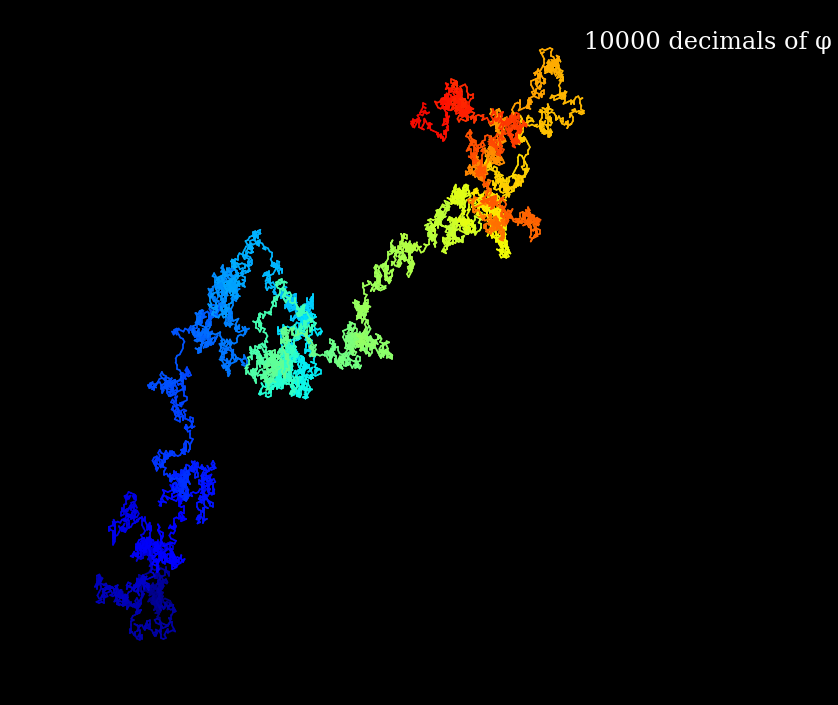

In [92]:
# Number phi
# 10,000 decimals
large_phi = '1.6180339887498948482045868343656381177203091798057628621354486227052604628189024497072072041893911374847540880753868917521266338622235369317931800607667263544333890865959395829056383226613199282902678806752087668925017116962070322210432162695486262963136144381497587012203408058879544547492461856953648644492410443207713449470495658467885098743394422125448770664780915884607499887124007652170575179788341662562494075890697040002812104276217711177780531531714101170466659914669798731761356006708748071013179523689427521948435305678300228785699782977834784587822891109762500302696156170025046433824377648610283831268330372429267526311653392473167111211588186385133162038400522216579128667529465490681131715993432359734949850904094762132229810172610705961164562990981629055520852479035240602017279974717534277759277862561943208275051312181562855122248093947123414517022373580577278616008688382952304592647878017889921990270776903895321968198615143780314997411069260886742962267575605231727775203536139362107673893764556060605921658946675955190040055590895022953094231248235521221241544400647034056573479766397239494994658457887303962309037503399385621024236902513868041457799569812244574717803417312645322041639723213404444948730231541767689375210306873788034417009395440962795589867872320951242689355730970450959568440175551988192180206405290551893494759260073485228210108819464454422231889131929468962200230144377026992300780308526118075451928877050210968424936271359251876077788466583615023891349333312231053392321362431926372891067050339928226526355620902979864247275977256550861548754357482647181414512700060238901620777322449943530889990950168032811219432048196438767586331479857191139781539780747615077221175082694586393204565209896985556781410696837288405874610337810544439094368358358138113116899385557697548414914453415091295407005019477548616307542264172939468036731980586183391832859913039607201445595044977921207612478564591616083705949878600697018940988640076443617093341727091914336501371576601148038143062623805143211734815100559013456101180079050638142152709308588092875703450507808145458819906336129827981411745339273120809289727922213298064294687824274874017450554067787570832373109759151177629784432847479081765180977872684161176325038612112914368343767023503711163307258698832587103363222381098090121101989917684149175123313401527338438372345009347860497929459915822012581045982309255287212413704361491020547185549611808764265765110605458814756044317847985845397312863016254487611485202170644041116607669505977578325703951108782308271064789390211156910392768384538633332156582965977310343603232254574363720412440640888267375843395367959312322134373209957498894699565647360072959998391288103197426312517971414320123112795518947781726914158911779919564812558001845506563295285985910009086218029775637892599916499464281930222935523466747593269516542140210913630181947227078901220872873617073486499981562554728113734798716569527489008144384053274837813782466917444229634914708157007352545707089772675469343822619546861533120953357923801460927351021011919021836067509730895752895774681422954339438549315533963038072916917584610146099505506480367930414723657203986007355076090231731250161320484358364817704848181099160244252327167219018933459637860878752870173935930301335901123710239171265904702634940283076687674363865132710628032317406931733448234356453185058135310854973335075996677871244905836367541328908624063245639535721252426117027802865604323494283730172557440583727826799603173936401328762770124367983114464369476705312724924104716700138247831286565064934341803900410178053395058772458665575522939158239708417729833728231152569260929959422400005606266786743579239724540848176519734362652689448885527202747787473359835367277614075917120513269344837529916499809360246178442675727767900191919070380522046123248239132610432719168451230602362789354543246176997575368904176365025478513824631465833638337602357789926729886321618583959036399818384582764491245980937043055559613797343261348304949496868108953569634828178128862536460842033946538194419457142666823718394918323709085748502665680398974406621053603064002608171126659954199368731609457228881092077882277203636684481532561728411769097926666552238468831137185299192163190520156863122282071559987646842355205928537175780765605036773130975191223973887224682580571597445740484298780735221598426676625780770620194304005425501583125030175340941171910192989038447250332988024501436796844169479595453045910313811621870456799786636617460595700034459701135251813460065655352034788811741499412748264152135567763940390710387088182338068033500380468001748082205910968442026446402187705340100318028816644153091393948156403192822785482414510503188825189970074862287942155895742820216657062188090578088050324676991297287210387073697406435667458920258656573978560859566534107035997832044633634648548949766388535104552729824229069984885369682804645974576265143435905093832124374333387051665714900590710567024887985804371815126100440381488040725244061642902247822715272411208506578883871249363510680636516674322232776775579739927037623191470473239551206070550399208844260370879084333426183841359707816482955371432196118950379771463000755597537957035522714493191321725564401283091805045008992187051211860693357315389593507903007367270233141653204234015537414426871540551164796114332302485440409406911456139873026039518281680344825254326738575900560432024537271929124864581333441698529939135747869895798643949802304711696715736228391201812731291658995275991922031837235682727938563733126547998591246327503006059256745497943508811929505685493259355318729141801136412187470752628106869830135760524719445593219553596104528303148839117693011965858343144248948985655842508341094295027719758335224429125736493807541711373924376014350682987849327129975122868819604983577515877178041069713196675347719479226365190163397712847390793361111914089983056033610609871717830554354035608952929081846414371392943781356048203894791257450770755751030024207266290018090422934249425906066614133228722698069014599451199547801639915141261252572828066433126165746938819510644216738718000110042184830258091654338374923641183888564685143150063731904295148146942431460895254707203740556691306922099080481945297511065046428105417755259095187131888359147659960413179602094153085855332387725380232727632977372143127968216716234421183201802881412747443168847218459392781435474099999072233203059262976611238327983316988253931262006503702884478286669404473079471047612558658375298623625099982323359715507233838332440815257781933642626304330265895817080045127887311593558774721725649470005163667257715392098409503274511215368730091219962952276591316370939686072713426926231547533043799331658110736964314217197943405639155121081081362626888569748068060116918941750272298741586991791453499462444194012197858601373660828690722365147713912687420966513787562059185432888834174292090156313328319357562208971376563097850156315498245644586542479293572282875060848145335135218172958793299117100324762220521946451053624505129884308713444395072442673514628617991832336459836963763272257569159723954383052086647474238151107927349483695239647926899369832491799950278950006045966131346336302494995148080532901790297518251587504900743518798351183603272277260171740453557165885557829729106195819351710554825793070910057635869901929721799516873117556314448564810022001425454055429273458837116020994794572082378043687189448056368918258024449963187834202749101533579107273362532890693347412380222201162627711930854485029541913200400999865566651775664095365619789781838045103035651013158945890287186108690589394713680148457001836649564720329433437429894642741255143590584348409195487015236140317391390361644019845505104912116979200120199960506994966403035086369290394100701945053201623487276323273244943963048089055425137972331475185207091025063685981679530481810073942453170023880475983432345041425843140636127210960228242337822809027976596077710849391517488731687771352239009117117350918600654620099024975852779254278165970383495058010626155333691093784659771052975022317307412177834418941184596586102980187787427445638669661277245038458605264151030408982577775447411533207640758816775149755380471162966777100587664615954967769270549623939857092550702740699781408431249653630718665337180605874224259816530705257383454157705429216299811491750861131176577317209561565647869547448927132060806354577946241453106698374211379816896382353330447788316933972872891810366408326985698825443851667586228993069643468489751484087903964760420361020602171739447026348763365439319522907738361673898117812424836557810503416945156362604300366574310847665487778012857792364541852244723617137422925584159313561286637167032807217155339264632573067306391085410886808574283858828060230334140855039097353872613451196292641599521278931135443146015273090255382710432596622674390374556361228613907831943357059003814870089866131539819585744233044197085669672229314273074138488278897558886079973870447020316683485694199096548029824931981765792682985562972301068277723516274078380743187782731821191969528005160879157212882633796823127256287000150018292975772999357909491964076344286157571354442789838304045470271019458004258202120234458063034503365814721854920367998997293535391968121331951653797453991114942444518303385884129040181781882137600665928494136775431745160540938711036871521164040582193447120448277596054169486453987832626954801391501903899593130670318661670663719640256928671388714663118919268568269199527645799771827875946096161721886810945465157886912241060981419726861925547878992631535947292282508054251690681401078179602188533076230556381631640192245450325765673925997651753080142716071430871886285983603746505713420467008343275423027704779331118366690323288530687387990713590074030490745988951364768760867844323824821893061757031956380323081971936356727419643872625870615433072963703812751517040600505759488272385634515639052657710426459476040556950959840888903762079956638801786185591594411172509231327977113803'

pathplot(large_phi, 'φ')

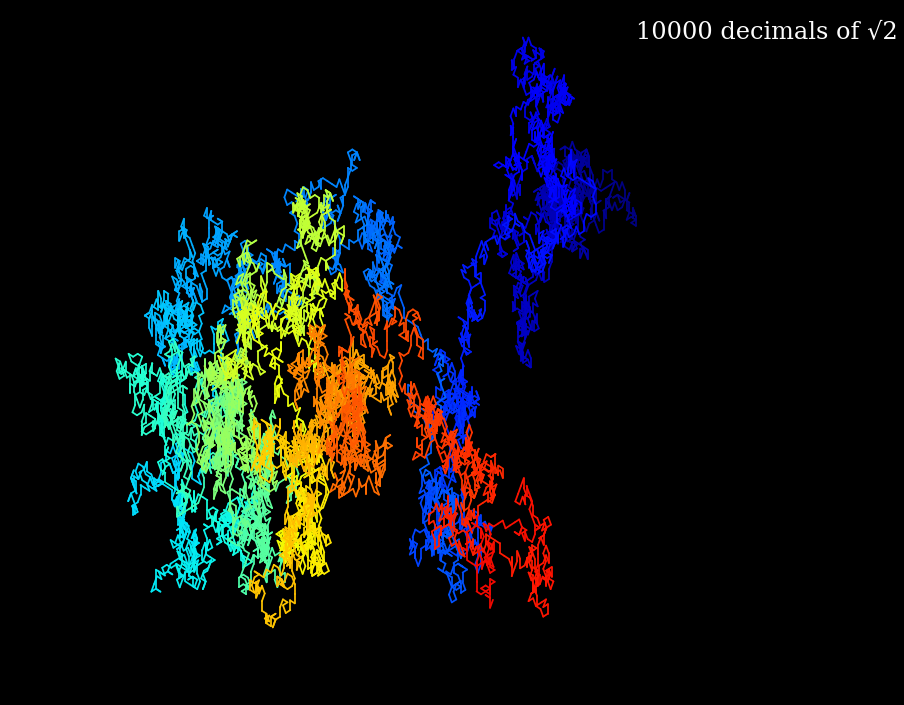

In [93]:
# Number √2
# 10,000 decimals
large_sqr = '1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727350138462309122970249248360558507372126441214970999358314132226659275055927557999505011527820605714701095599716059702745345968620147285174186408891986095523292304843087143214508397626036279952514079896872533965463318088296406206152583523950547457502877599617298355752203375318570113543746034084988471603868999706990048150305440277903164542478230684929369186215805784631115966687130130156185689872372352885092648612494977154218334204285686060146824720771435854874155657069677653720226485447015858801620758474922657226002085584466521458398893944370926591800311388246468157082630100594858704003186480342194897278290641045072636881313739855256117322040245091227700226941127573627280495738108967504018369868368450725799364729060762996941380475654823728997180326802474420629269124859052181004459842150591120249441341728531478105803603371077309182869314710171111683916581726889419758716582152128229518488472089694633862891562882765952635140542267653239694617511291602408715510135150455381287560052631468017127402653969470240300517495318862925631385188163478001569369176881852378684052287837629389214300655869568685964595155501644724509836896036887323114389415576651040883914292338113206052433629485317049915771756228549741438999188021762430965206564211827316726257539594717255934637238632261482742622208671155839599926521176252698917540988159348640083457085181472231814204070426509056532333398436457865796796519267292399875366617215982578860263363617827495994219403777753681426217738799194551397231274066898329989895386728822856378697749662519966583525776198939322845344735694794962952168891485492538904755828834526096524096542889394538646625744927556381964410316979833061852019379384940057156333720548068540575867999670121372239475821426306585132217408832382947287617393647467837431960001592188807347857617252211867490424977366929207311096369721608933708661156734585334833295254675851644710757848602463600834449114818587655554286455123314219926311332517970608436559704352856410087918500760361009159465670676883605571740076756905096136719401324935605240185999105062108163597726431380605467010293569971042425105781749531057255934984451126922780344913506637568747760283162829605532422426957534529028838768446429173282770888318087025339852338122749990812371892540726475367850304821591801886167108972869229201197599880703818543332536460211082299279293072871780799888099176741774108983060800326311816427988231171543638696617029999341616148786860180455055539869131151860103863753250045581860448040750241195184305674533683613674597374423988553285179308960373898915173195874134428817842125021916951875593444387396189314549999906107587049090260883517636224749757858858368037457931157339802099986622186949922595913276423619410592100328026149874566599688874067956167391859572888642473463585886864496822386006983352642799056283165613913942557649062065186021647263033362975075697870606606856498160092718709292153132368281356988937097416504474590960537472796524477094099241238710614470543986743647338477454819100872886222149589529591187892149179833981083788278153065562315810360648675873036014502273208829351341387227684176678436905294286984908384557445794095986260742499549168028530773989382960362133539875320509199893607513906444495768456993471276364507163279154701597733548638939423257277540038260274785674172580951416307159597849818009443560379390985590168272154034581581521004936662953448827107292396602321638238266612626830502572781169451035379371568823365932297823192986064679789864092085609558142614363631004615594332550474493975933999125419532300932175304476533964706627611661753518754646209676345587386164880198848497479264045065444896910040794211816925796857563784881498986416854994916357614484047021033989215342377037233353115645944389703653166721949049351882905806307401346862641672470110653463493916407146285567980177933814424045269137066609777638784866238003392324370474115331872531906019165996455381157888413808433232105337674618121780142960928324113627525408873729051294073394794330619439569367020794295158782283493219316664111301549594698378977674344435393377099571349884078908508158923660700886581054709497904657229888808924612828160131337010290802909997456478495815456146487155163905024198579061310934587833062002622073724716766854554999049940857108099257599288932366154382719550057816251330381531465779079268685008069844284791524242754410268057563215653220618857512251130639370253629271619682512591920252160587011895967322442392674237344907646467273753479645988191498079317180024238554538860383683108007791824664627541174442500187277795181643834514634612990207633430179685543856316677235183893366670422221109391449302879638128398893117313084300421255501854985065294556377660314612559091046113847682823595924772286290426427361632645854433928772638603431498048963973633297548859256811492968361267258985738332164366634870234773026101061305072986115341299488087744731112295426527516536659117301423606265258690771982170370981046443604772267392829874152593069562063847108274082184906737233058743029709242899481739244078693752844010443990485208788519141935415129006817351703069386970590047425157655248078447362144105016200845444122255956202984725940352801906798068098300396453985685930458625260637797453559927747299064888745451242496076378010863900191058092874764720751109238605950195432281602088796215162338521612875228518025292876183257037172857406763944909825464422184654308806610580201584728406712630254593798906508168571371656685941300533197036596403376674146104956376510308366134893109478026812935573318905519705201845150399690986631525124116111925940552808564989319589834562331983683494880806171562439112866312797848371978953369015277600549805516635019785557110140555297633841275044686046476631832661165182067501204766991098721910444744032689436415959427921994423553718704299559240314091712848158543866005385713583639816309452407557009325168243441682408361979273372825215462246961533217026829950979089034594858878349439616204358422497397187113958927305092197054917176961600445580899427878880369169432894595147226722926124850696173163809410821860045286102696547576304310256027152313969482135519821409716549097319992834925674097490392297126348693414574933198041718076111963902278664075922434167762466236238913110270343304576368141128321326308582239456219598086612939996201234156176318174312420089014983848560480879864608393596492366514296812577314322914568716827621996118278269531574983802624651759054103976181287604216386134502213262727756612441133610775195557749508656360673786650623185640699122801875741785494661253275997697960597760590756489106661015838417202818530432119044657752554277543798726054881736198267581686283295260789932226683602838513512281059318591028641508157056319717315183136250243590414632122392176633982689368253150530059891547029095371932662073411234947433678846902013904978428521634144292145895582878476693946464267812219049785636355263368278051860098699248937786002398769169807656621943898544370805946433362333810587458162354756001365924352426571430834655457680023708146757325254702550747637471635067851599173693793251032682760628645914618204721486370370771926926823623334720379245964691810526139153086280291440965482563873092730426544662929045896063751918711469345361973324789572707031530930901921199199993615765003503984054067425387927527922724733566770607837911384488936261367657060263600315132952095395202854897384486256134924414708607086602676349978793420875836121947116994223848482595914304528107062601508969135303017720062717054402090669514915274597719705947695474095210287872557856880022193717743558110793930883384558648277291008629554566141306721230848740227121058686323388237413884428938155444647105755651468435702946635062893873569868688376480326519528414653517395302736120137420300986739838514321900436028982698293529399414129230580384565022707216815161941011449826301364900877048398488386090653368599054583895203185648041493272142390865164999431659207965953569430723112911629286797517156688905439322035691293324570208067194440497304943981408227829602799424541083166675921424835182723817205041039274288801556223380796147512433514731021284545944899444996000752437519570116683417447490795882099517836768023236517674972301487457742725994760962198432714835298611190272873584905217975908374197486026706053746231530039375212367867752848692195857137554269684827836317861109933680143915905974842858054516130230143979057016108898627779610750673332676048654929251399781390535882276893732204941483940135560356560442140176120605131806891989962606184831853401836237821726637580455247196266174925422852804571442048578342113228008528704205488992341278554812367615377071042544698685219911228354266349997127483660762462418207364666171283947484732804744304033441072004287271275670279567582429262719454580530026664899650795697781786219421720052371653694677041951119127046248360511302890464377511486948878496151188414719100012558838366606772084112351535588112677895715585904125762616010675131535802124273318710006358249545040995794072547989003168265123731190556682915194305370848930786919742829049038603723116099283424317122250994547150192866648787107951995180054633883844315481724635480244518030845273431000621371034625733060012349737443558180965678464641533905146569193245623531405779193698988423647183525375805257713311200797104068315492665402026046806818391437827214769063242469517128636738443139833371176159418699934662623453734523567940124168092291163609563721674528391709909146648507392051516056047378710615470216996074656930979442612146925615934256494019122989514732544715181263258368897282262833295240359700727863364604594707124174729468775705958157349962848099567839255474240448991887071069675242507745201229360810574142653234724064162141033353340551104521261750359028403745459186450472762434207177092979354010214096464502836834180407586081001407216192477179809859681115404464437285689592868319777977869346415984697451339177415379048778808300220583350467465553230285873258351'

pathplot(large_sqr, '√2')

## Animations with turtle

As an extra, check below a small code using turtle from python STL to plot a nice animation of the path.

In [65]:
import turtle

turtle.speed('fastest')
walk = [lx,ly]
for x,y in zip(*walk):
    turtle.goto(x*10,y*10)

turtle.exitonclick()